# 🎵 Hit Recipe Masters: Seasonal Success Secrets 🎵

Discover how artists craft their seasonal hits with the perfect ingredients:
- BPM (The Tempo)
- Energy (The Heat)
- Release Timing (The Seasoning)

Let's see who's cooking up the biggest hits! 🔥

In [2]:
# Import our kitchen tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set up our kitchen
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = [12, 6]
sns.set_style('whitegrid')

# Custom colors for our visualizations
season_colors = {
    'Summer': '#FF9933',  # Warm orange
    'Winter': '#66CCFF',  # Cool blue
    'Spring': '#99CC33',  # Fresh green
    'Fall': '#CC6633'     # Autumn brown
}

In [6]:
# Load our ingredients
sheet_url = "https://docs.google.com/spreadsheets/d/1ae96nZRL_kJWb_EEv2avxMOgGClvyc77SpY-VBqVGiY/edit#gid=1052928543"
csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
df = pd.read_csv(csv_export_url)

# Prepare seasonal classifications
df['release_date'] = pd.to_datetime(df['track_album_release_date'], format='mixed')
df['month'] = df['release_date'].dt.month

def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df['season'] = df['month'].apply(get_season)

# Calculate artist baselines
artist_avg_popularity = df.groupby('track_artist')['track_popularity'].mean()
df['artist_avg_popularity'] = df['track_artist'].map(artist_avg_popularity)
df['popularity_lift'] = df['track_popularity'] - df['artist_avg_popularity']

# Define hit threshold
hit_threshold = df['track_popularity'].quantile(0.75)
df['is_hit'] = df['track_popularity'] >= hit_threshold

## 👨‍🍳 Master Chefs: Artists Who Perfect the Seasonal Recipe

🏆 Our Master Chefs 🏆

Artists who consistently cook up seasonal hits:
🌟 Sam Feldt's Seasonal Success Recipe 🌟

Signature Hit: Post Malone (feat. RANI)
Season: Spring
Release Date: 2019-05-24

The Recipe:
BPM: 107
Energy Level: 0.64

The Results:
Base Popularity: 30.0
Hit Popularity: 83.0
Popularity Lift: +53.0


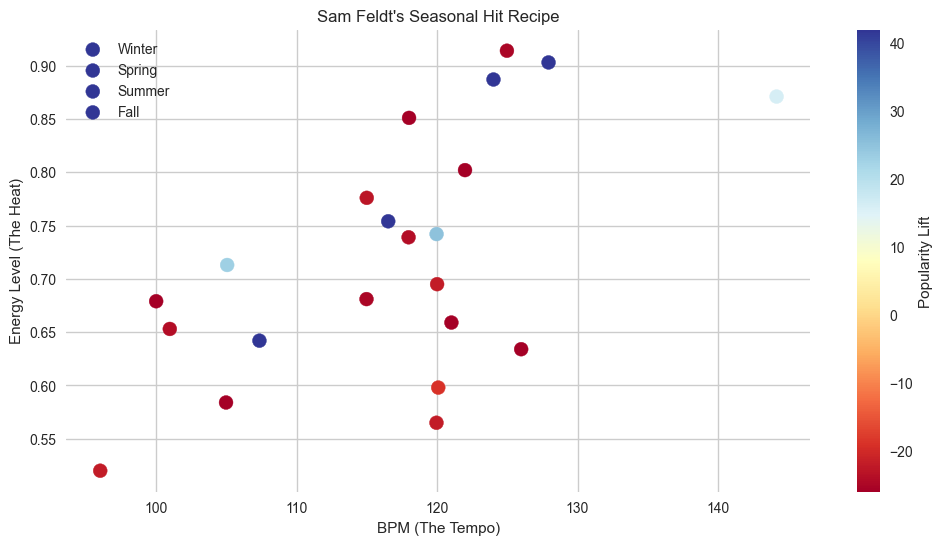

🌟 Scorpions's Seasonal Success Recipe 🌟

Signature Hit: Wind Of Change
Season: Winter
Release Date: 1990-01-01

The Recipe:
BPM: 152
Energy Level: 0.52

The Results:
Base Popularity: 26.9
Hit Popularity: 77.0
Popularity Lift: +50.1


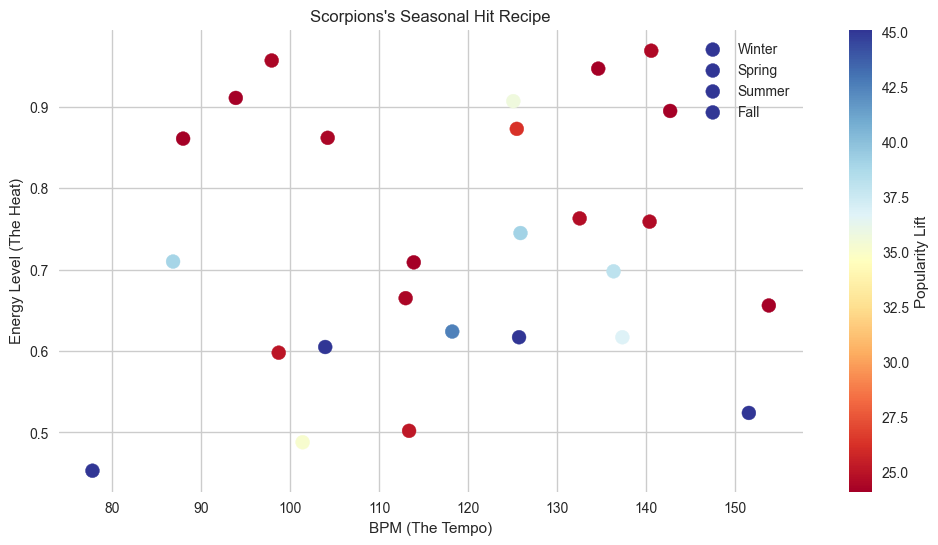

🌟 Duki's Seasonal Success Recipe 🌟

Signature Hit: Goteo
Season: Summer
Release Date: 2019-08-07

The Recipe:
BPM: 108
Energy Level: 0.78

The Results:
Base Popularity: 29.4
Hit Popularity: 79.0
Popularity Lift: +49.6


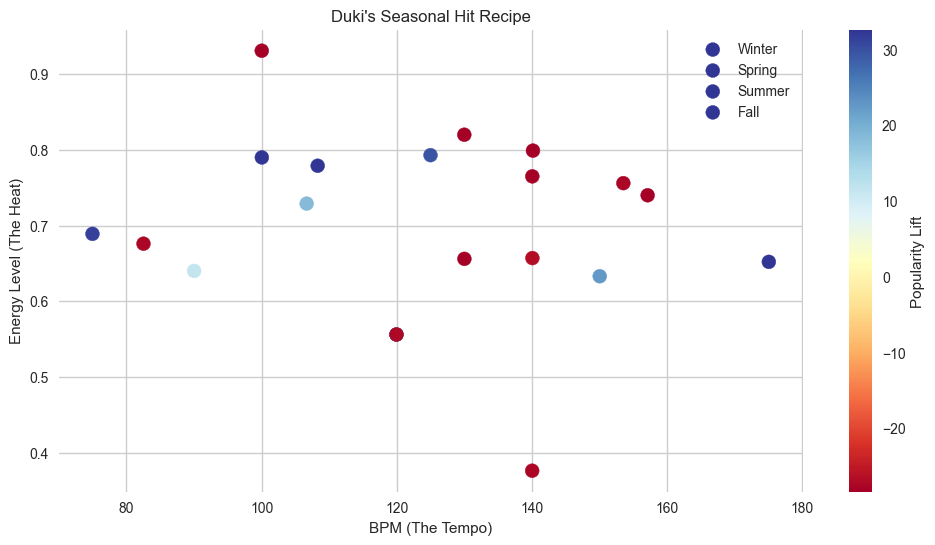

🌟 Paul McCartney's Seasonal Success Recipe 🌟

Signature Hit: Band On The Run - Remastered 2010
Season: Winter
Release Date: 1973-12-05

The Recipe:
BPM: 125
Energy Level: 0.60

The Results:
Base Popularity: 23.9
Hit Popularity: 71.0
Popularity Lift: +47.1


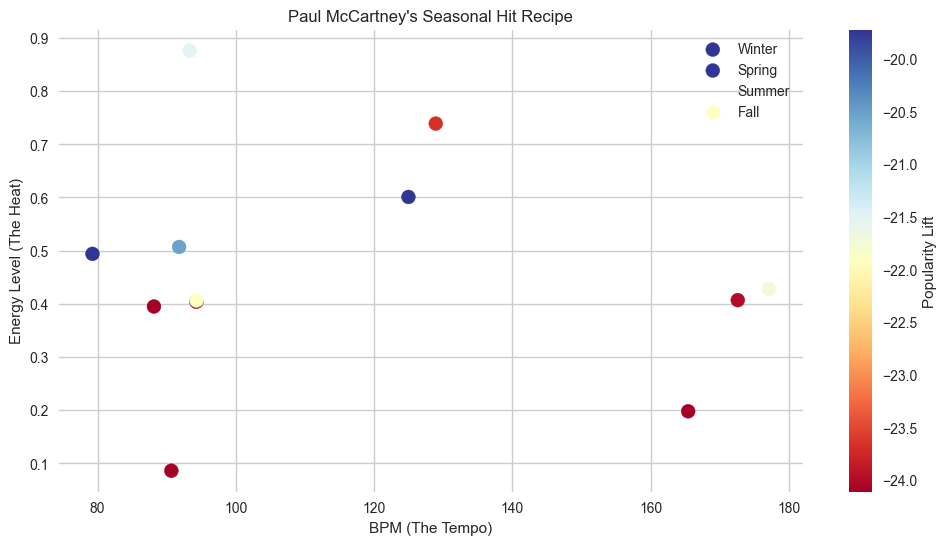

🌟 The Black Eyed Peas's Seasonal Success Recipe 🌟

Signature Hit: RITMO (Bad Boys For Life)
Season: Fall
Release Date: 2019-10-12

The Recipe:
BPM: 105
Energy Level: 0.72

The Results:
Base Popularity: 49.3
Hit Popularity: 96.0
Popularity Lift: +46.7


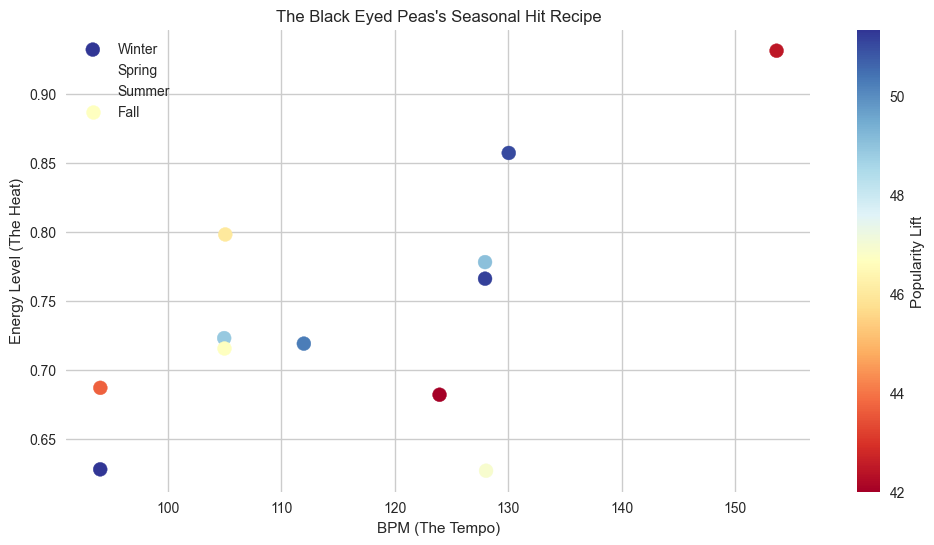

In [7]:
def show_artist_recipe(artist_name):
    """Show an artist's seasonal success recipe"""
    artist_data = df[df['track_artist'] == artist_name].copy()
    if len(artist_data) == 0:
        print(f"No data found for {artist_name}")
        return
    
    # Get their biggest seasonal hit
    best_hit = artist_data.loc[artist_data['popularity_lift'].idxmax()]
    
    print(f"🌟 {artist_name}'s Seasonal Success Recipe 🌟")
    print(f"\nSignature Hit: {best_hit['track_name']}")
    print(f"Season: {best_hit['season']}")
    print(f"Release Date: {best_hit['release_date'].strftime('%Y-%m-%d')}")
    print(f"\nThe Recipe:")
    print(f"BPM: {best_hit['tempo']:.0f}")
    print(f"Energy Level: {best_hit['energy']:.2f}")
    print(f"\nThe Results:")
    print(f"Base Popularity: {best_hit['artist_avg_popularity']:.1f}")
    print(f"Hit Popularity: {best_hit['track_popularity']:.1f}")
    print(f"Popularity Lift: +{best_hit['popularity_lift']:.1f}")
    
    # Plot their seasonal performance
    plt.figure(figsize=(12, 6))
    for season in ['Winter', 'Spring', 'Summer', 'Fall']:
        season_songs = artist_data[artist_data['season'] == season]
        plt.scatter(season_songs['tempo'], season_songs['energy'],
                   c=season_songs['popularity_lift'], cmap='RdYlBu',
                   s=100, label=season)
    
    plt.colorbar(label='Popularity Lift')
    plt.title(f"{artist_name}'s Seasonal Hit Recipe")
    plt.xlabel('BPM (The Tempo)')
    plt.ylabel('Energy Level (The Heat)')
    plt.legend()
    plt.show()

# Find our master chefs (artists with big seasonal lifts)
seasonal_masters = df[df['popularity_lift'] >= 10].groupby('track_artist').agg({
    'popularity_lift': ['max', 'count'],
    'track_popularity': 'max',
    'artist_avg_popularity': 'first'
}).round(2)

seasonal_masters = seasonal_masters[seasonal_masters[('popularity_lift', 'count')] >= 3]
seasonal_masters = seasonal_masters.sort_values(('popularity_lift', 'max'), ascending=False)

print("🏆 Our Master Chefs 🏆")
print("\nArtists who consistently cook up seasonal hits:")
for artist in seasonal_masters.head(5).index:
    show_artist_recipe(artist)

## 🍽️ Seasonal Specialties: Genre Success Recipes


🌟 Summer's Special Menu 🌟

📀 post-teen pop
Average Popularity: 61.1
Recipe: 119 BPM, 0.68 Energy
Example Hit: hot girl bummer by blackbear

📀 permanent wave
Average Popularity: 56.9
Recipe: 122 BPM, 0.72 Energy
Example Hit: Every Breath You Take by The Police

📀 reggaeton
Average Popularity: 56.8
Recipe: 120 BPM, 0.76 Energy
Example Hit: El Favor (with Nicky Jam & Sech, feat. Farruko, Zion & Lunay) by Dimelo Flow
--------------------------------------------------

🌟 Winter's Special Menu 🌟

📀 post-teen pop
Average Popularity: 58.3
Recipe: 125 BPM, 0.74 Energy
Example Hit: My Oh My (feat. DaBaby) by Camila Cabello

📀 hip hop
Average Popularity: 55.8
Recipe: 117 BPM, 0.58 Energy
Example Hit: The Box by Roddy Ricch

📀 permanent wave
Average Popularity: 54.0
Recipe: 127 BPM, 0.71 Energy
Example Hit: Livin' On A Prayer by Bon Jovi
--------------------------------------------------

🌟 Spring's Special Menu 🌟

📀 post-teen pop
Average Popularity: 59.9
Recipe: 128 BPM, 0.71 Energy
Example Hit:

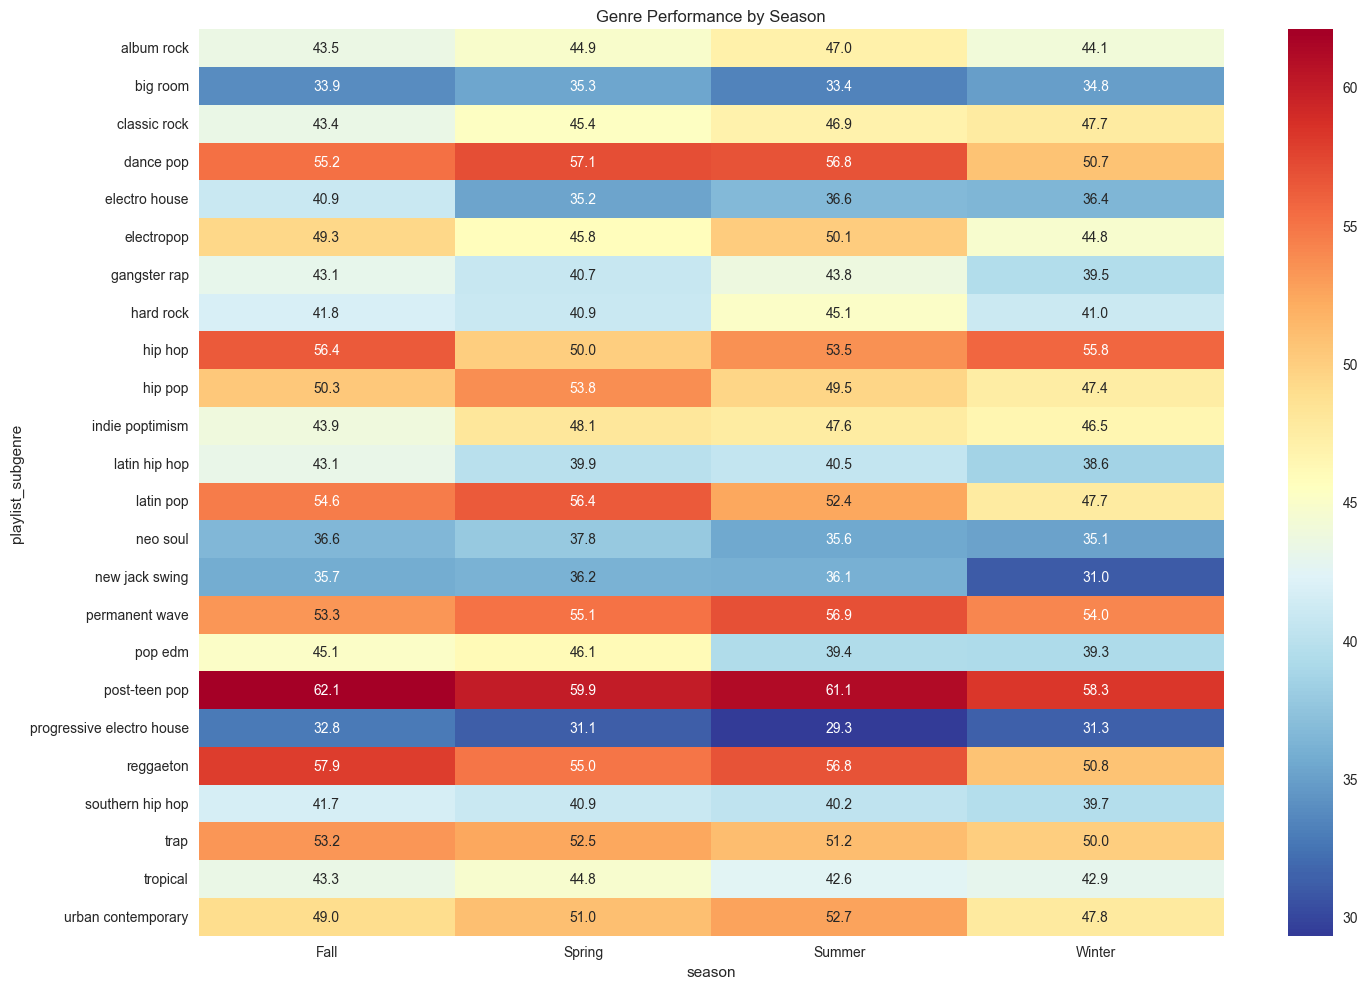

In [17]:
# Analyze genre success by season
genre_season_success = df.groupby(['playlist_subgenre', 'season']).agg({
    'track_popularity': ['mean', 'max'],
    'tempo': 'mean',
    'energy': 'mean',
    'track_name': 'count'
}).round(2)

# Find best performing genres per season
for season in ['Summer', 'Winter', 'Spring', 'Fall']:
    print(f"\n🌟 {season}'s Special Menu 🌟")
    
    # Get top genres
    season_data = genre_season_success.xs(season, level=1)
    top_genres = season_data.nlargest(3, ('track_popularity', 'mean'))
    
    for genre in top_genres.index:
        stats = top_genres.loc[genre]
        print(f"\n📀 {genre}")
        print(f"Average Popularity: {stats[('track_popularity', 'mean')]:.1f}")
        print(f"Recipe: {stats[('tempo', 'mean')]:.0f} BPM, {stats[('energy', 'mean')]:.2f} Energy")
        
        # Find example hit
        example_hit = df[
            (df['playlist_subgenre'] == genre) &
            (df['season'] == season) &
            (df['is_hit'])
        ].sort_values('track_popularity', ascending=False).iloc[0]
        
        print(f"Example Hit: {example_hit['track_name']} by {example_hit['track_artist']}")
    print("-" * 50)

# Plot genre performance heatmap
plt.figure(figsize=(15, 10))
heatmap_data = pd.pivot_table(
    df,
    values='track_popularity',
    index='playlist_subgenre',
    columns='season',
    aggfunc='mean'
)

sns.heatmap(heatmap_data, cmap='RdYlBu_r', center=heatmap_data.mean().mean(),
            annot=True, fmt='.1f')
plt.title('Genre Performance by Season')
plt.tight_layout()
plt.show()

## 🎯 Secret Ingredients: Winning BPM-Energy Combinations


🌟 Summer's Secret Recipe 🌟

Perfect BPM: 121.1 ± 28.3
Ideal Energy: 0.68 ± 0.18

Perfect Examples:

🎵 hot girl bummer by blackbear
Genre: post-teen pop
BPM: 130, Energy: 0.56
Popularity: 94

🎵 Ride It by Regard
Genre: dance pop
BPM: 118, Energy: 0.75
Popularity: 94

🎵 China by Anuel AA
Genre: dance pop
BPM: 105, Energy: 0.81
Popularity: 93
--------------------------------------------------

🌟 Winter's Secret Recipe 🌟

Perfect BPM: 121.8 ± 28.5
Ideal Energy: 0.68 ± 0.18

Perfect Examples:

🎵 The Box by Roddy Ricch
Genre: hip hop
BPM: 117, Energy: 0.59
Popularity: 98

🎵 Yummy by Justin Bieber
Genre: dance pop
BPM: 146, Energy: 0.52
Popularity: 95

🎵 Life Is Good (feat. Drake) by Future
Genre: hip hop
BPM: 142, Energy: 0.61
Popularity: 93
--------------------------------------------------

🌟 Spring's Secret Recipe 🌟

Perfect BPM: 122.0 ± 28.2
Ideal Energy: 0.67 ± 0.18

Perfect Examples:

🎵 No Idea by Don Toliver
Genre: hip hop
BPM: 128, Energy: 0.61
Popularity: 92

🎵 I Don't Care (with J

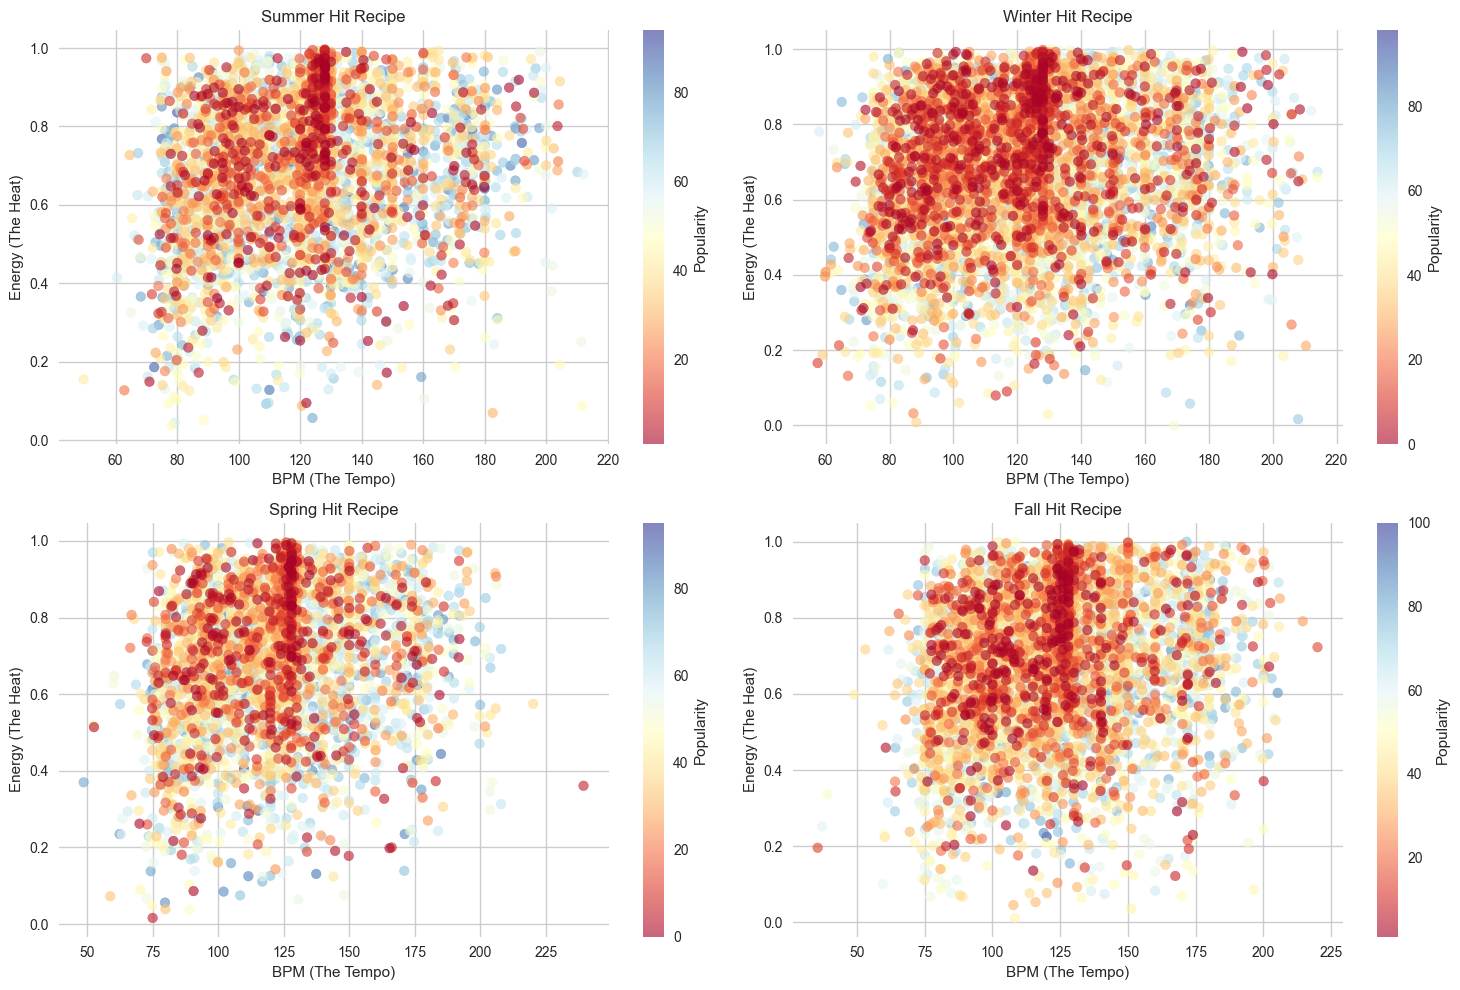

In [18]:
# Analyze successful combinations by season
for season in ['Summer', 'Winter', 'Spring', 'Fall']:
    print(f"\n🌟 {season}'s Secret Recipe 🌟")
    
    season_hits = df[(df['season'] == season) & df['is_hit']]
    
    # Calculate optimal ranges
    bpm_range = season_hits['tempo'].agg(['mean', 'std']).round(1)
    energy_range = season_hits['energy'].agg(['mean', 'std']).round(2)
    
    print(f"\nPerfect BPM: {bpm_range['mean']} ± {bpm_range['std']}")
    print(f"Ideal Energy: {energy_range['mean']} ± {energy_range['std']}")
    
    # Find perfect examples
    perfect_hits = season_hits[
        (abs(season_hits['tempo'] - bpm_range['mean']) <= bpm_range['std']) &
        (abs(season_hits['energy'] - energy_range['mean']) <= energy_range['std'])
    ].sort_values('track_popularity', ascending=False)
    
    print("\nPerfect Examples:")
    for _, hit in perfect_hits.head(3).iterrows():
        print(f"\n🎵 {hit['track_name']} by {hit['track_artist']}")
        print(f"Genre: {hit['playlist_subgenre']}")
        print(f"BPM: {hit['tempo']:.0f}, Energy: {hit['energy']:.2f}")
        print(f"Popularity: {hit['track_popularity']:.0f}")
    print("-" * 50)

# Plot success patterns
plt.figure(figsize=(15, 10))
for i, season in enumerate(['Summer', 'Winter', 'Spring', 'Fall'], 1):
    plt.subplot(2, 2, i)
    
    season_data = df[df['season'] == season]
    plt.scatter(season_data['tempo'], season_data['energy'],
                c=season_data['track_popularity'], cmap='RdYlBu',
                alpha=0.6)
    
    plt.colorbar(label='Popularity')
    plt.title(f'{season} Hit Recipe')
    plt.xlabel('BPM (The Tempo)')
    plt.ylabel('Energy (The Heat)')

plt.tight_layout()
plt.show()